In [1]:
# Libraries.
import matplotlib, matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Setup.
% matplotlib inline



In [2]:
gate_1315=pd.read_csv('../../../data/gatecounts_edit_1315.csv')
gate_1315.head()

,Unnamed: 0,locationid,entries,servicedate,servicetime_fraction,weekday,month
0,0,1002,0,2013-01-01 00:00:00,3.00,1,1
1,1,1002,1,2013-01-01 00:00:00,5.00,1,1
2,2,1002,2,2013-01-01 00:00:00,5.25,1,1
3,3,1002,3,2013-01-01 00:00:00,5.50,1,1
4,4,1002,6,2013-01-01 00:00:00,5.75,1,1


In [3]:
mbta_daily=pd.read_csv('../../../data/mbta_daily.csv')
mbta_daily.head()

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1130: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,locationid,service_day,entries,name,line_1,line_2,lat,lon,service_datetime,fog,...,entries_weeks_ago_1,entries_weeks_ago_2,entries_weeks_ago_3,rain_predict,rain_fall_predict,snow_predict,snow_fall_predict,snow_accum,snow_accum_predict,dist_to_center
0,1002,2013-01-01 00:00:00,1892,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-01 03:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
1,1002,2013-01-02 00:00:00,5134,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-02 04:45:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
2,1002,2013-01-03 00:00:00,5733,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-03 05:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
3,1002,2013-01-04 00:00:00,6125,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-04 05:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
4,1002,2013-01-05 00:00:00,3410,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-05 04:15:00,0,...,NaN,NaN,NaN,0,0,1,0,0,0,3.404767


###Comment:

Create a narrow data set containing only snow info for each day

In [4]:
snow_daily=mbta_daily[['locationid','service_day','snow','snow_fall']].groupby('service_day').agg(np.mean).reset_index()
snow_daily=snow_daily[['service_day','snow','snow_fall']]
print snow_daily.head()

           service_day  snow  snow_fall
0  2013-01-01 00:00:00     0          0
1  2013-01-02 00:00:00     0          0
2  2013-01-03 00:00:00     0          0
3  2013-01-04 00:00:00     0          0
4  2013-01-05 00:00:00     0          0


In [5]:
def split_date(t):
    return t.split(' ')[0]

In [6]:
snow_daily['service_day']=map(split_date,snow_daily['service_day'].values)
snow_daily['service_day']=pd.to_datetime(snow_daily['service_day'], format="%Y-%m-%d")

In [7]:
# trace_snow','snow_02','snow_24','snow_48','snow_815','snow_15',

snow_daily['trace_snow']=(snow_daily['snow']==1)&(snow_daily['snow_fall']==0.0)
snow_daily['snow_02']=(snow_daily['snow_fall']>0.0)&(snow_daily['snow_fall']<=2.0)
snow_daily['snow_24']=(snow_daily['snow_fall']>2.0)&(snow_daily['snow_fall']<=4.0)
snow_daily['snow_48']=(snow_daily['snow_fall']>4.0)&(snow_daily['snow_fall']<=8.0)
snow_daily['snow_815']=(snow_daily['snow_fall']>8.0)&(snow_daily['snow_fall']<=15.0)
snow_daily['snow_15']=(snow_daily['snow_fall']>15.0)

In [8]:
snow_daily.head()

,service_day,snow,snow_fall,trace_snow,snow_02,snow_24,snow_48,snow_815,snow_15
0,2013-01-01,0,0,False,False,False,False,False,False
1,2013-01-02,0,0,False,False,False,False,False,False
2,2013-01-03,0,0,False,False,False,False,False,False
3,2013-01-04,0,0,False,False,False,False,False,False
4,2013-01-05,0,0,False,False,False,False,False,False


###Comment:

Create a narrow data set containing only rain info for each day

In [9]:
rain_daily=mbta_daily.groupby('service_day').agg(np.mean).reset_index()
rain_daily=rain_daily[['service_day','rain','rain_fall']]
print rain_daily.head()

           service_day  rain  rain_fall
0  2013-01-01 00:00:00     0          0
1  2013-01-02 00:00:00     0          0
2  2013-01-03 00:00:00     0          0
3  2013-01-04 00:00:00     0          0
4  2013-01-05 00:00:00     0          0


In [10]:
rain_daily['drizzle']=(rain_daily['rain']==1)&(rain_daily['rain_fall']<=0.1)
rain_daily['rain_not_drizzle']=rain_daily['rain_fall']>0.1

print rain_daily.head()

           service_day  rain  rain_fall drizzle rain_not_drizzle
0  2013-01-01 00:00:00     0          0   False            False
1  2013-01-02 00:00:00     0          0   False            False
2  2013-01-03 00:00:00     0          0   False            False
3  2013-01-04 00:00:00     0          0   False            False
4  2013-01-05 00:00:00     0          0   False            False


In [11]:
def split_date(t):
    return t.split(' ')[0]


rain_daily['service_day']=map(split_date,rain_daily['service_day'].values)
rain_daily['service_day']=pd.to_datetime(rain_daily['service_day'], format="%Y-%m-%d")

###Comment:

Create a narrow data set containing only temperature info for each day

In [18]:

temp_daily=mbta_daily.groupby('service_day').agg(np.mean).reset_index()
temp_daily=temp_daily[['service_day','temp_mean']]

temp_daily['service_day']=map(split_date,temp_daily['service_day'].values)
temp_daily['service_day']=pd.to_datetime(temp_daily['service_day'], format="%Y-%m-%d")
print temp_daily.head()

  service_day  temp_mean
0  2013-01-01         29
1  2013-01-02         21
2  2013-01-03         16
3  2013-01-04         30
4  2013-01-05         35


In [14]:
temp_daily['freezing']=temp_daily['temp_mean']<=32
temp_daily['32_50']=(temp_daily['temp_mean']>32)&(temp_daily['temp_mean']<=50)
temp_daily['50_85']=(temp_daily['temp_mean']>50)&(temp_daily['temp_mean']<=85)
temp_daily['hot']=temp_daily['temp_mean']>85

print temp_daily.head()

  service_day  temp_mean freezing  32_50  50_85    hot
0  2013-01-01         29     True  False  False  False
1  2013-01-02         21     True  False  False  False
2  2013-01-03         16     True  False  False  False
3  2013-01-04         30     True  False  False  False
4  2013-01-05         35    False   True  False  False


##Determining snow bins

It's difficult to create equal-length bins, especially when approximately 75% of snowfall is 0-2 inches. The rest of the bins are as close to equally sized as possible.

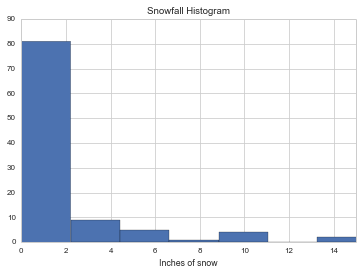

Snow days  104
Trace snow:  37
0-2 in snow:  44
2-4 in snow:  9
4-8 in snow:  6
8-15 in snow:  6
+15 in snow:  2


In [4]:
days_with_snow=snow_daily[snow_daily['snow']==1]


plt.hist(days_with_snow['snow_fall'].values,bins=10)
plt.xlim([0,15])
plt.title('Snowfall Histogram')
plt.xlabel('Inches of snow')
plt.show()


print 'Snow days ',len(days_with_snow)
print 'Trace snow: ',len(days_with_snow[days_with_snow['snow_fall']==0])
print '0-2 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>0)&(days_with_snow['snow_fall']<=2)])
print '2-4 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>2)&(days_with_snow['snow_fall']<=4)])
print '4-8 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>4)&(days_with_snow['snow_fall']<=8)])
print '8-15 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>8)&(days_with_snow['snow_fall']<=15)])
print '+15 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>15)])



In [12]:
station_info=pd.read_csv('../../../data/Stations_clean.csv')
station_latlong=pd.read_csv('../../../data/stations_latlong.csv')
station_latlong=station_latlong[['stationid','lat','lon','line_1','line_2']]

print station_latlong.head()

   stationid        lat        lon line_1 line_2
0       1002  42.329550 -71.056960    Red    NaN
1       1004  42.321438 -71.052393    Red    NaN
2       1005  42.274816 -71.029176    Red    NaN
3       1006  42.265615 -71.019402    Red    NaN
4       1007  42.250879 -71.004798    Red    NaN


In [15]:
station_info[['stationid','name','line_temp']].to_csv('stations_dave.csv')

In [13]:
station_info=station_info.merge(station_latlong,on='stationid')
print station_info.head()

   Unnamed: 0  stationid           name line_temp  grouping  dist_to_center  \
0           0       1002  Andrew Square       Red         2        3.404767   
1           1       1004     JFK/U Mass       Red         0        4.328881   
2           2       1005   North Quincy       Red         1        9.777437   
3           3       1006      Wollaston       Red         1       10.976943   
4           4       1007  Quincy Center       Red         1       12.909591   

         lat        lon line_1 line_2  
0  42.329550 -71.056960    Red    NaN  
1  42.321438 -71.052393    Red    NaN  
2  42.274816 -71.029176    Red    NaN  
3  42.265615 -71.019402    Red    NaN  
4  42.250879 -71.004798    Red    NaN  


In [19]:
#scale up to entries per hr
gate_1315['entries']=gate_1315['entries']*4.

In [28]:
gate_1315['servicedate']=map(split_date,gate_1315['servicedate'].values)
gate_1315['servicedate']=pd.to_datetime(gate_1315['servicedate'], format="%Y-%m-%d")

In [38]:
'''
station_id: station id of interest
bins: a list of tuples except for the first and last elements which are singletons. Used for identifying snowfall levels
    For example, bins=[ (0), (0,2), (2,4)..., (15)  ]
    
'''

def subset(station_id,bins,begin_time=5.25,end_time=24):
    
    res={}
    res['weekday']={}
    res['weekday']['snow']={}
    res['weekday']['rain']={}
    
    res['weekend']={}
    res['weekend']['snow']={}
    res['weekend']['rain']={}
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    #want to subset the dataframe to only include months in which there may be snow
    # don't want the seasonal trends of Summer, Spring, early Fall to skew my values for when there 
    # is no snow
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=3)]
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    
    #get subset of snow records
    no_snow=station_records[station_records['snow']==False]
    #print mean_ridership
    snow=station_records[station_records['snow']==True]  
    no_snow_mean=no_snow[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    
    res['station_id']=1.*station_id
    res['station_name']= station_info[station_info['stationid']==station_id]['name'].values[0]
    res['coords']= [station_info[station_info['stationid']==station_id]['lat'].values[0],station_info[station_info['stationid']==station_id]['lon'].values[0]]
    
    res['line']=list([])
    
    res['line'].append(station_info[station_info['stationid']==station_id]['line_1'].values[0])
    
    if(isinstance(station_info[station_info['stationid']==station_id]['line_2'].values[0], basestring) ):
        res['line'].append(station_info[station_info['stationid']==station_id]['line_2'].values[0])
    
    
    res['time_intervals']=list(no_snow_mean.index.values)

    #print len(res['time_intervals'])
    res['weekday']['snow']['mean_ent']=list(no_snow_mean['entries'].values)
    res['weekday']['snow']['aggr_ent']=np.sum(list(no_snow_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekday']['snow']['mean_ent_snow']={}
    res['weekday']['snow']['aggr_ent_snow']={}
    
    # create time series for the first, singleton element in bins
    snow_subset=snow[snow['snow_fall']==bins[0]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['snow']['mean_ent_snow'][str(bins[0])]=list(1.*snow_subset['entries'].values)
    res['weekday']['snow']['aggr_ent_snow'][str(bins[0])]=np.sum(list((1.*snow_subset['entries']).values))
    
    for i in range(1,len(bins)-1):
        snow_subset=snow[(snow['snow_fall']>bins[i][0])&(snow['snow_fall']<=bins[i][1])]
        snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
        #print len(snow_subset)
        res['weekday']['snow']['mean_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=list(1.*snow_subset['entries'].values)
        res['weekday']['snow']['aggr_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=np.sum(list(1.*snow_subset['entries'].values))

        
    # create time series for the last, singleton element in bins
    snow_subset=snow[snow['snow_fall']>=bins[-1]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['snow']['mean_ent_snow'][str(bins[(-1)])]=list(1.*snow_subset['entries'].values)
    res['weekday']['snow']['aggr_ent_snow'][str(bins[(-1)])]=np.sum(list(1.*snow_subset['entries'].values))
    
    
    #########################
    ## Repeat for weekend####
    #########################
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    #want to subset the dataframe to only include months in which there may be snow
    # don't want the seasonal trends of Summer, Spring, early Fall to skew my values for when there 
    # is no snow
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=3)]
    station_records=station_records[station_records['weekday']>=5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of snow records
    no_snow=station_records[station_records['snow']==False]
    #print mean_ridership
    
    snow=station_records[station_records['snow']==True]  
    no_snow_mean=no_snow[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekend']['snow']['mean_ent']=list(no_snow_mean['entries'].values)
    res['weekend']['snow']['aggr_ent']=np.sum(list(no_snow_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekend']['snow']['mean_ent_snow']={}
    res['weekend']['snow']['aggr_ent_snow']={}
    
    # create time series for the first, singleton element in bins
    snow_subset=snow[snow['snow_fall']==bins[0]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['snow']['mean_ent_snow'][str(bins[0])]=list(1.*snow_subset['entries'].values)
    res['weekend']['snow']['aggr_ent_snow'][str(bins[0])]=np.sum(list((1.*snow_subset['entries']).values))
    
    for i in range(1,len(bins)-1):
        snow_subset=snow[(snow['snow_fall']>bins[i][0])&(snow['snow_fall']<=bins[i][1])]
        snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
        #print len(snow_subset)
        res['weekend']['snow']['mean_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=list(1.*snow_subset['entries'].values)
        res['weekend']['snow']['aggr_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=np.sum(list(1.*snow_subset['entries'].values))

        
    # create time series for the last, singleton element in bins
    snow_subset=snow[snow['snow_fall']>=bins[-1]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['snow']['mean_ent_snow'][str(bins[(-1)])]=list(1.*snow_subset['entries'].values)
    res['weekend']['snow']['aggr_ent_snow'][str(bins[(-1)])]=np.sum(list(1.*snow_subset['entries'].values))

    ################
    ## Rain records#
    ################
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(rain_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of rain records
    no_rain=station_records[station_records['rain']==False]
    drizzle=station_records[station_records['drizzle']==True]
    rain=station_records[station_records['rain_not_drizzle']==True]  
    
    no_rain_mean=no_rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekday']['rain']['mean_ent']=list(no_rain_mean['entries'].values)
    res['weekday']['rain']['aggr_ent']=np.sum(list(no_rain_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekday']['rain']['mean_ent_rain']={}
    res['weekday']['rain']['aggr_ent_rain']={}
    
    # create time series for the first, singleton element in bins
    #rain_subset=rain[rain['rain_fall']==bins[0]]
    drizzle_subset=drizzle[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['rain']['mean_ent_rain']['drizzle']=list(1.*drizzle_subset['entries'].values)
    res['weekday']['rain']['aggr_ent_rain']['drizzle']=np.sum(list((1.*drizzle_subset['entries']).values))
        
    # create time series for the last, singleton element in bins
    #rain_subset=rain[rain['rain_fall']>=bins[-1]]
    rain_subset=rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['rain']['mean_ent_rain']['rain_no_drizzle']=list(1.*rain_subset['entries'].values)
    res['weekday']['rain']['aggr_ent_rain']['rain_no_drizzle']=np.sum(list(1.*rain_subset['entries'].values))
    
    #################### Now add rain for weekends
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']>=5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(rain_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of rain records
    no_rain=station_records[station_records['rain']==False]
    drizzle=station_records[station_records['drizzle']==True]
    rain=station_records[station_records['rain_not_drizzle']==True]  
    
    no_rain_mean=no_rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekend']['rain']['mean_ent']=list(no_rain_mean['entries'].values)
    res['weekend']['rain']['aggr_ent']=np.sum(list(no_rain_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekend']['rain']['mean_ent_rain']={}
    res['weekend']['rain']['aggr_ent_rain']={}
    
    # create time series for the first, singleton element in bins
    #rain_subset=rain[rain['rain_fall']==bins[0]]
    drizzle_subset=drizzle[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['rain']['mean_ent_rain']['drizzle']=list(1.*drizzle_subset['entries'].values)
    res['weekend']['rain']['aggr_ent_rain']['drizzle']=np.sum(list((1.*drizzle_subset['entries']).values))
        
    # create time series for the last, singleton element in bins
    #rain_subset=rain[rain['rain_fall']>=bins[-1]]
    rain_subset=rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['rain']['mean_ent_rain']['rain_no_drizzle']=list(1.*rain_subset['entries'].values)
    res['weekend']['rain']['aggr_ent_rain']['rain_no_drizzle']=np.sum(list(1.*rain_subset['entries'].values))
    
    return res
    


In [40]:
t=subset(1009,bins=[ (0), (0,2),(2,4),(4,8),(8,15),(15)] ,begin_time=5.25,end_time=24)

print t.keys()

['time_intervals', 'station_id', 'coords', 'weekday', 'line', 'weekend', 'station_name']


In [47]:
import math

In [41]:
subset(1009,bins=[ (0), (0,2),(2,4),(4,8),(8,15),(15)] ,begin_time=5.25,end_time=24)

{'coords': [42.35170961, -71.05499983],
 'line': ['Red'],
 'station_id': 1009.0,
 'station_name': 'South Station',
 'time_intervals': [5.25,
  5.5,
  5.75,
  6.0,
  6.25,
  6.5,
  6.75,
  7.0,
  7.25,
  7.5,
  7.75,
  8.0,
  8.25,
  8.5,
  8.75,
  9.0,
  9.25,
  9.5,
  9.75,
  10.0,
  10.25,
  10.5,
  10.75,
  11.0,
  11.25,
  11.5,
  11.75,
  12.0,
  12.25,
  12.5,
  12.75,
  13.0,
  13.25,
  13.5,
  13.75,
  14.0,
  14.25,
  14.5,
  14.75,
  15.0,
  15.25,
  15.5,
  15.75,
  16.0,
  16.25,
  16.5,
  16.75,
  17.0,
  17.25,
  17.5,
  17.75,
  18.0,
  18.25,
  18.5,
  18.75,
  19.0,
  19.25,
  19.5,
  19.75,
  20.0,
  20.25,
  20.5,
  20.75,
  21.0,
  21.25,
  21.5,
  21.75,
  22.0,
  22.25,
  22.5,
  22.75,
  23.0,
  23.25,
  23.5,
  23.75],
 'weekday': {'rain': {'aggr_ent': 23747.585770400648,
   'aggr_ent_rain': {'drizzle': 24520.4278508772,
    'rain_no_drizzle': 23578.335401919958},
   'mean_ent': [20.732394366197184,
    31.753501400560225,
    23.941176470588236,
    30.24089635

In [122]:
## Now want to aggregate stuff for Dave so he can encode the MBTA mapping
'''
station_id: station id of interest
bins: a list of tuples except for the first and last elements which are singletons. Used for identifying snowfall levels
    For example, bins=[ (0), (0,2), (2,4)..., (15)  ]
    
'''

def subset2(station_id,bins,begin_time=5.25,end_time=24):
    
    res={}
    res['weekday']={}
    res['weekday']['snow']={}
    res['weekday']['rain']={}
    
    res['weekend']={}
    res['weekend']['snow']={}
    res['weekend']['rain']={}
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    #Take care of the weekend/weekday avgs and the subset
    weekdays=station_records[station_records['weekday']<5]
    res['weekday_daily_avg']=np.mean(weekdays[['entries','servicedate']].groupby('servicedate').agg(np.sum)['entries'])
    weekends=station_records[station_records['weekday']>=5]
    res['weekend_daily_avg']=np.mean(weekends[['entries','servicedate']].groupby('servicedate').agg(np.sum)['entries'])
    
    oct_apr=station_records[(station_records['month']>=10) |(station_records['month']<=4)]
    oct_apr_weekdays=oct_apr[oct_apr['weekday']<5]
    res['weekday']['snow']['no_snow']=np.mean(oct_apr_weekdays[['entries','servicedate']].groupby('servicedate').agg(np.sum)['entries'])

    oct_apr_weekends=oct_apr[oct_apr['weekday']>=5]
    res['weekend']['snow']['no_snow']=np.mean(oct_apr_weekends[['entries','servicedate']].groupby('servicedate').agg(np.sum)['entries'])
    
    #continue on main processing
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    #return station_records
        
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=4)]

    #get subset of snow records
    no_snow=station_records[station_records['snow']==False]
    #print mean_ridership
    
    snow=station_records[station_records['snow']==True]  
    no_snow_mean=no_snow[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    
    res['station_id']=1.*station_id
    res['station_name']= station_info[station_info['stationid']==station_id]['name'].values[0]
    res['coords']= [station_info[station_info['stationid']==station_id]['lat'].values[0],station_info[station_info['stationid']==station_id]['lon'].values[0]]
    
    res['line']=list([])
    
    res['line'].append(station_info[station_info['stationid']==station_id]['line_1'].values[0])
    
    if(isinstance(station_info[station_info['stationid']==station_id]['line_2'].values[0], basestring) ):
        res['line'].append(station_info[station_info['stationid']==station_id]['line_2'].values[0])
        
    # create time series for the first, singleton element in bins
    snow_subset=snow[snow['snow_fall']==bins[0]]
    res['weekday']['snow'][str(bins[0])]=np.mean(snow_subset[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    
    for i in range(1,len(bins)-1):
        #print i,str(bins[i])
        
        snow_subset=snow[(snow['snow_fall']>bins[i][0])&(snow['snow_fall']<=bins[i][1])]
        res['weekday']['snow'][str(bins[i])]=np.mean(snow_subset[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
        
        if(math.isnan(res['weekday']['snow'][str(bins[i])])):
            res['weekday']['snow'][str(bins[i])]=0.0

    # create time series for the last, singleton element in bins
    snow_subset=snow[snow['snow_fall']>=bins[-1]]
    res['weekday']['snow'][str(bins[-1])]=np.mean(snow_subset[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    
    if(math.isnan(res['weekday']['snow'][str(bins[-1])])):
        res['weekday']['snow'][str(bins[-1])]=0.0
    
    #########################
    ## Repeat for weekend####
    #########################
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    #want to subset the dataframe to only include months in which there may be snow
    # don't want the seasonal trends of Summer, Spring, early Fall to skew my values for when there 
    # is no snow
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=4)]
    station_records=station_records[station_records['weekday']>=5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of snow records
    no_snow=station_records[station_records['snow']==False]
    #print mean_ridership
    
    snow=station_records[station_records['snow']==True]  
    no_snow_mean=no_snow[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    
    # create time series for the first, singleton element in bins
    snow_subset=snow[snow['snow_fall']==bins[0]]
    res['weekend']['snow'][str(bins[0])]=np.mean(snow_subset[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    
    for i in range(1,len(bins)-1):
        snow_subset=snow[(snow['snow_fall']>bins[i][0])&(snow['snow_fall']<=bins[i][1])]
        res['weekend']['snow'][str(bins[i])]=np.mean(snow_subset[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])

        if(i==len(bins)-2):
            res['weekday']['snow'][str(bins[i])]=np.mean(snow_subset[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
        if(math.isnan(res['weekend']['snow'][str(bins[i])])):
            res['weekend']['snow'][str(bins[i])]=0.0
    
    # create time series for the last, singleton element in bins
    snow_subset=snow[snow['snow_fall']>=bins[-1]]
    res['weekend']['snow'][str(bins[-1])]=np.mean(snow_subset[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    
    if(math.isnan(res['weekend']['snow'][str(bins[-1])])):
        res['weekend']['snow'][str(bins[-1])]=0.0

    ################
    ## Rain records#
    ################
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(rain_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of rain records
    no_rain=station_records[station_records['rain']==False]
    drizzle=station_records[station_records['drizzle']==True]
    rain=station_records[station_records['rain_not_drizzle']==True]  
    
    res['weekday']['rain']['no_rain']=np.mean(no_rain[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    res['weekday']['rain']['drizzle']=np.mean(drizzle[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    res['weekday']['rain']['rain_not_drizzle']=np.mean(rain[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    
    #################### Now add rain for weekends
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']>=5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(rain_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of rain records
    no_rain=station_records[station_records['rain']==False]
    drizzle=station_records[station_records['drizzle']==True]
    rain=station_records[station_records['rain_not_drizzle']==True]  
    
    res['weekend']['rain']['no_rain']=np.mean(no_rain[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    res['weekend']['rain']['drizzle']=np.mean(drizzle[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    res['weekend']['rain']['rain_not_drizzle']=np.mean(rain[['entries','servicedate']].groupby(['servicedate']).agg(np.sum)['entries'])
    
    return res
    


In [42]:
import json

### Preparing master list containing series for each station

Note: station_id is stored as a float due to serializable issues in json.dump

In [43]:

master_list=list([])

station_ids=list(station_info['stationid'].unique())
bins_=[ (0), (0,2),(2,4),(4,8),(8,15),(15)]

## keys in master dict have to be strings in order to be compatible with json.dump()
for station in station_ids:
    master_list.append(subset(station,bins= bins_ ,begin_time=5.25,end_time=24))
    
print len(master_list)
    

61


In [44]:
# write actual json file
filename='station_series.json'

with open(filename, 'w') as outfile:
    json.dump(master_list, outfile)

In [86]:
with open(filename) as data_file:    
    data = json.load(data_file)
    
print data[0]

[u'weekday_daily_avg', u'station_id', u'oct_apr_weekend_daily', u'coords', u'weekday', u'oct_apr_weekday_daily', u'weekend_daily_avg', u'line', u'weekend', u'station_name']


## Write shorter, summary json file 

This json file will be the same as the above one except the series 'mean_ent_snow','mean_ent', and 'time_intervals' will be removed. Wanted to have both available just in case

In [381]:

summary_list=list([])

station_ids=list(station_info['stationid'].unique())
bins_=[ (0), (0,2),(2,4),(4,8),(8,15),(15)]
remove=['weekend','weekday','time_intervals']

## keys in master dict have to be strings in order to be compatible with json.dump()
for station in station_ids:
    t=subset(station,bins= bins_ ,begin_time=5.25,end_time=24)
    
    for key in remove:
        t.pop(key,None)
        
    summary_list.append(t)
    
print len(summary_list)
    

61


In [382]:
# write actual json file
filename='station_summary.json'

with open(filename, 'w') as outfile:
    json.dump(summary_list, outfile)

In [408]:
with open(filename) as data_file:    
    data = json.load(data_file)
    
data[0]

{u'aggr_ent': 6010.281460552052,
 u'aggr_ent_snow': {u'0': 6025.081196581196,
  u'0_2': 5606.535349388798,
  u'15': 3153.0,
  u'2_4': 5475.4285714285725,
  u'4_8': 4524.666666666666,
  u'8_15': 3771.4833333333336},
 u'coords': [42.32955, -71.05696],
 u'station_id': 1002.0,
 u'station_name': u'Andrew Square'}

##Aggregate Across Stations

Generate plot and play with way we'd want to display days of snow.

In [3]:
from sets import Set

In [4]:
def split_date(t):
    temp=str(t)
    return temp.split(' ')[0]


gate_1315['servicedate']=map(split_date,gate_1315['servicedate'].values)
gate_1315['servicedate']=pd.to_datetime(gate_1315['servicedate'], format="%Y-%m-%d")

In [6]:
gate_1315['is_weekday']=gate_1315['weekday']<5

In [7]:
all_count=gate_1315[['entries','servicedate']].groupby('servicedate').agg(np.sum).reset_index()
all_stations=gate_1315[['is_weekday','servicedate']].groupby('servicedate').agg(np.median).reset_index()
all_stations.head()

,servicedate,is_weekday
0,2013-01-01,True
1,2013-01-02,True
2,2013-01-03,True
3,2013-01-04,True
4,2013-01-05,False


In [26]:
# free up mem
#%xdel gate_1315
%xdel mbta_daily
%xdel rain_daily
#%xdel snow_daily
#%xdel all_stations

In [10]:
all_stations['entries']=all_count['entries']
all_stations.head()

,servicedate,is_weekday,entries
0,2013-01-01,True,146267
1,2013-01-02,True,419529
2,2013-01-03,True,435656
3,2013-01-04,True,471005
4,2013-01-05,False,239873


In [35]:
all_stations.to_csv('all_stations.csv')

In [34]:
all_stations.head()

,servicedate,is_weekday,entries,smooth2,snow,trace_snow,snow_02,snow_24,snow_48,snow_815,snow_15,rain,rain_fall,drizzle,rain_not_drizzle
12,2013-01-13,False,170377,380512.653061,0,False,False,False,False,False,False,1,0.00,True,False
13,2013-01-14,True,462359,389447.183673,0,False,False,False,False,False,False,0,0.00,False,False
14,2013-01-15,True,481257,392317.836735,0,False,False,False,False,False,False,0,0.00,False,False
15,2013-01-16,True,474938,394333.571429,1,False,False,True,False,False,False,1,0.37,False,True
16,2013-01-17,True,484786,395987.102041,0,False,False,False,False,False,False,0,0.00,False,False


In [18]:
all_stations=all_stations.merge(snow_daily, left_on='servicedate',right_on='service_day')
all_stations.head()

,servicedate,is_weekday,entries,service_day,snow,snow_fall,trace_snow,snow_02,snow_24,snow_48,snow_815,snow_15
0,2013-01-01,True,146267,2013-01-01,0,0,False,False,False,False,False,False
1,2013-01-02,True,419529,2013-01-02,0,0,False,False,False,False,False,False
2,2013-01-03,True,435656,2013-01-03,0,0,False,False,False,False,False,False
3,2013-01-04,True,471005,2013-01-04,0,0,False,False,False,False,False,False
4,2013-01-05,False,239873,2013-01-05,0,0,False,False,False,False,False,False


In [24]:
all_stations=all_stations.merge(rain_daily, left_on='servicedate',right_on='service_day')
all_stations.head()

,servicedate,is_weekday,entries,service_day_x,snow,snow_fall,trace_snow,snow_02,snow_24,snow_48,snow_815,snow_15,service_day_y,rain,rain_fall,drizzle,rain_not_drizzle
0,2013-01-01,True,146267,2013-01-01,0,0,False,False,False,False,False,False,2013-01-01,0,0,False,False
1,2013-01-02,True,419529,2013-01-02,0,0,False,False,False,False,False,False,2013-01-02,0,0,False,False
2,2013-01-03,True,435656,2013-01-03,0,0,False,False,False,False,False,False,2013-01-03,0,0,False,False
3,2013-01-04,True,471005,2013-01-04,0,0,False,False,False,False,False,False,2013-01-04,0,0,False,False
4,2013-01-05,False,239873,2013-01-05,0,0,False,False,False,False,False,False,2013-01-05,0,0,False,False


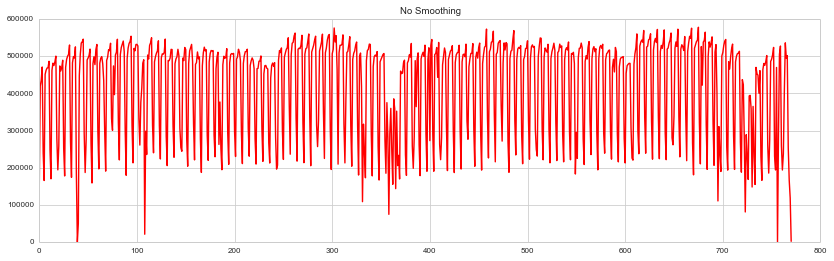

In [27]:
plt.figure(figsize=(14,4))

all_stations['smooth']=pd.rolling_mean(all_stations['entries'],7)
all_stations['smooth2']=pd.rolling_mean(all_stations['smooth'],7)

plt.title('No Smoothing')
plt.plot(all_stations.index,all_stations['entries'],color='red',ls='-',fillstyle='none')

#for val in snow_daily[snow_daily['snow']==1]['service_day']:
    #print val
#    plt.axvline(x=val,alpha=0.3,color='blue')

In [32]:
print all_stations.columns

Index([u'servicedate', u'is_weekday', u'entries', u'service_day_x', u'snow', u'snow_fall', u'trace_snow', u'snow_02', u'snow_24', u'snow_48', u'snow_815', u'snow_15', u'service_day_y', u'rain', u'rain_fall', u'drizzle', u'rain_not_drizzle', u'smooth', u'smooth2'], dtype='object')


In [33]:
all_stations=all_stations[['servicedate','is_weekday','entries','smooth2','snow','trace_snow','snow_02','snow_24','snow_48','snow_815','snow_15',
                    'rain','rain_fall','drizzle','rain_not_drizzle']]

# drop first two weeks due to NAN created in rolling average
all_stations=all_stations.dropna()

In [38]:
import datetime, json

class DateTimeEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, datetime.datetime):
            return obj.isoformat()
        elif isinstance(obj, datetime.date):
            return obj.isoformat()
        elif isinstance(obj, datetime.timedelta):
            return (datetime.datetime.min + obj).time().isoformat()
        else:
            return super(DateTimeEncoder, self).default(obj)

DateTimeEncoder().encode(all_stations.iloc[0]['servicedate'])

'"2013-01-13T00:00:00"'

In [40]:
#type(DateTimeEncoder().encode(all_count.iloc[0]['servicedate']))
temp_list=[]
for i in range(len(all_stations)):
    temp_list.append(DateTimeEncoder().encode(all_stations.iloc[i]['servicedate']))


In [41]:
all_stations.head()

,servicedate,is_weekday,entries,smooth2,snow,trace_snow,snow_02,snow_24,snow_48,snow_815,snow_15,rain,rain_fall,drizzle,rain_not_drizzle
12,2013-01-13,False,170377,380512.653061,0,False,False,False,False,False,False,1,0.00,True,False
13,2013-01-14,True,462359,389447.183673,0,False,False,False,False,False,False,0,0.00,False,False
14,2013-01-15,True,481257,392317.836735,0,False,False,False,False,False,False,0,0.00,False,False
15,2013-01-16,True,474938,394333.571429,1,False,False,True,False,False,False,1,0.37,False,True
16,2013-01-17,True,484786,395987.102041,0,False,False,False,False,False,False,0,0.00,False,False


In [44]:
print all_stations['rain']*all_stations['is_weekday']

12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
...
756    0
757    0
758    0
759    0
760    0
761    0
762    0
763    0
764    0
765    1
766    0
767    0
768    0
769    0
770    0
Length: 759, dtype: float64


In [97]:
all_stations['drizzle'].unique()

array([True, False], dtype=object)

In [110]:

all_stations_dict={}

all_stations_dict['days']=temp_list
all_stations_dict['entries']=list(all_stations['smooth2'].values)
all_stations_dict['weekend']={}
all_stations_dict['weekday']={}

for st in ['trace_snow','snow_02','snow_24','snow_48','snow_815','snow_15','drizzle','rain_not_drizzle']:

    all_stations_dict['weekday'][st]=list(map(int,map(bool,all_stations[st])&(all_stations['is_weekday'])))
    all_stations_dict['weekend'][st]=list(map(int,map(bool,all_stations[st])&(all_stations['is_weekday']==False)))
    
    #all_stations_dict['weekday'][st]=list((all_stations[st])&(all_stations['is_weekday']))

    #print map(bool,all_stations[st])
    #break


In [111]:
# write actual json file
filename='full_summary.json'

with open(filename, 'w') as outfile:
    json.dump(all_stations_dict, outfile)

In [112]:
with open(filename) as data_file:    
    data = json.load(data_file)
    
print data['weekend'].keys()

[u'snow_02', u'rain_not_drizzle', u'snow_15', u'snow_24', u'trace_snow', u'snow_48', u'snow_815', u'drizzle']
